# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
MiceCount = combined_data_df["Mouse ID"].nunique()
MiceCount

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df[combined_data_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined = combined_data_df[combined_data_df['Mouse ID'] != 'g989']
clean_combined


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
MiceCount = clean_combined["Mouse ID"].nunique()
MiceCount

248

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

dr_mean = clean_combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
dr_median = clean_combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
dr_var = clean_combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
dr_std = clean_combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
dr_sem = clean_combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

single_summary_df = pd.DataFrame({
    "Mean Tumor Volume": dr_mean,
    "Median Tumor Volume": dr_median,
    "Tumor Volume Variance": dr_var,
    "Tumor Volume Std. Dev.": dr_std,
    "Tumor Volume Std. Err.": dr_sem
})
    

single_summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [57]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = single_summary_df.describe()
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_combined.agg({

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,50.975982,49.902123,47.858440,6.821103,0.502785
std,5.621289,4.705415,16.008423,1.216096,0.103473
min,40.216745,40.673236,23.486704,4.846308,0.320955
25%,52.388490,50.778739,40.249804,6.342952,0.475424
50%,53.060651,51.819532,46.192684,6.794337,0.530365
75%,54.183257,52.396036,60.738703,7.793357,0.579276
max,55.235638,53.698743,68.553577,8.279709,0.603860


## Bar and Pie Charts

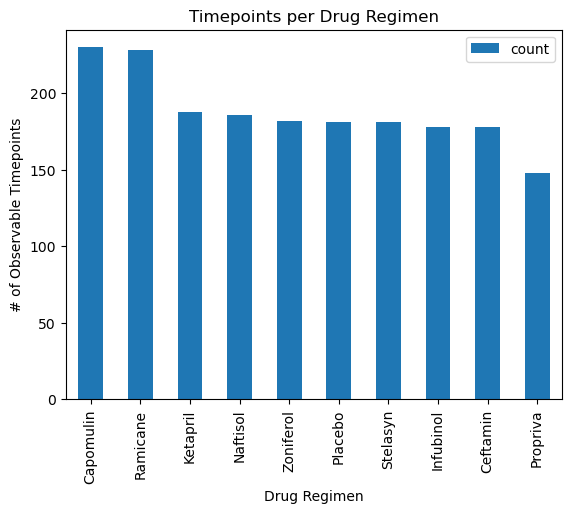

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plotdata = clean_combined['Drug Regimen'].value_counts()
timepoints_df = pd.DataFrame(plotdata)
ax = timepoints_df.plot(kind="bar")
ax.set_ylabel("# of Observable Timepoints")
ax.set_title("Timepoints per Drug Regimen")
plt.show()


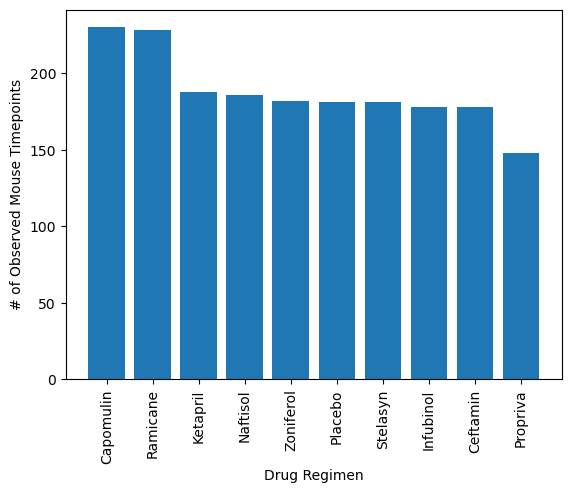

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(plotdata.index.values, plotdata.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

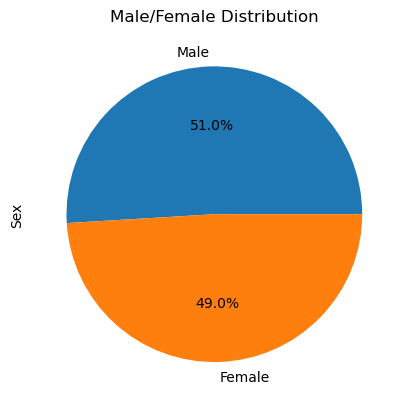

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_pie = clean_combined['Sex'].value_counts().plot.pie(autopct='%1.1f%%', title='Male/Female Distribution', ylabel='Sex')


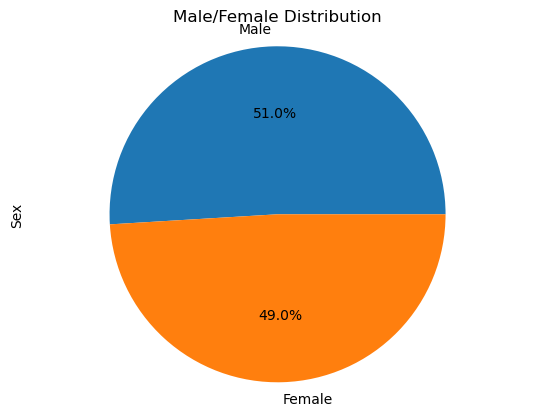

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_combined['Sex'].value_counts()
labels = ["Male", "Female"]
plt.pie(sex, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Male/Female Distribution')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_combined.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_clean = pd.merge(last_timepoints, clean_combined, on="Mouse ID")

last_timepoints_df = merged_clean[merged_clean['Timepoint_x'] == merged_clean['Timepoint_y']]
last_timepoints_df


,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,45,67.973419,2
19,a251,45,Infubinol,Female,21,25,45,65.525743,1
29,a262,45,Placebo,Female,17,29,45,70.717621,4
39,a275,45,Ceftamin,Female,20,28,45,62.999356,3
46,a366,30,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...,...
1839,z435,10,Propriva,Female,12,26,10,48.710661,0
1849,z578,45,Ramicane,Male,11,16,45,30.638696,0
1859,z581,45,Infubinol,Female,24,25,45,62.754451,3
1869,z795,45,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volume_last = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = last_timepoints_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes
regimencheck = last_timepoints_df['Drug Regimen'].isin(regimens)
regimens_only_df = last_timepoints_df[regimencheck]
tumor_volumes_df = regimens_only_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
    
    # add subset
for regimen in regimens: 
    filtered_df = tumor_volumes_df[tumor_volumes_df['Drug Regimen'] == regimen]
    volume_last.append(filtered_df['Tumor Volume (mm3)'].tolist())

    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Values below 17.10923096124998 could be outliers.
Values above 93.82025999125003 could be outliers.


<function matplotlib.pyplot.show(close=None, block=None)>

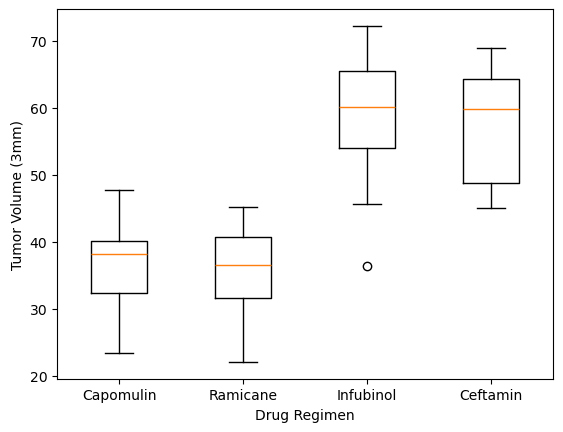

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
x = [1, 2, 3, 4]
y = [20, 30, 40, 50, 60, 70]
plt.boxplot(volume_last)
plt.xlabel('Drug Regimen')
plt.xticks(x, regimens)
plt.ylabel('Tumor Volume (3mm)')
plt.show


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

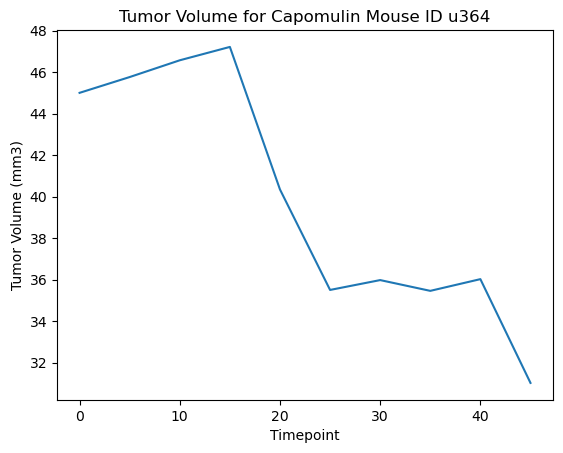

In [54]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']

#Chose a Mouse ID sample at random
mice_list = capomulin['Mouse ID'].unique()
mice_list
import random
chosen_mouse_id = random.choice(mice_list)
capomulin_mouse = capomulin[capomulin['Mouse ID'] == chosen_mouse_id]

#plot the line and labels
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume for Capomulin Mouse ID {chosen_mouse_id}')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

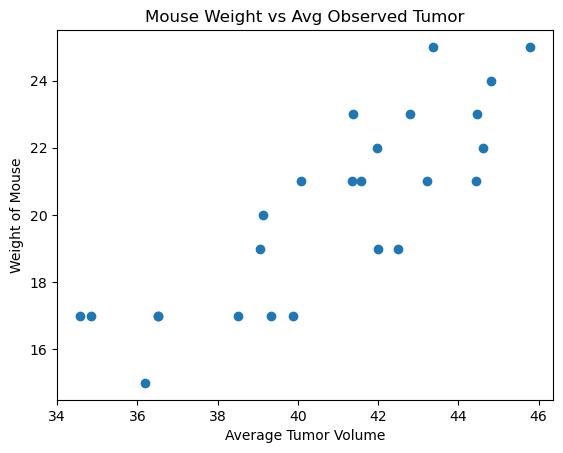

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin
Tvolumes = []
weights = []
for mouse in mice_list:
    each_tumor_vol = capomulin[capomulin["Mouse ID"] == mouse]
    Tvolumes.append(each_tumor_vol['Tumor Volume (mm3)'].tolist())
    weight = capomulin[capomulin['Mouse ID'] == mouse]['Weight (g)'].iloc[0]
    weights.append(weight)
Tvolumes_df = pd.DataFrame(Tvolumes)
avg_tumor_vol = Tvolumes_df.mean(axis=1)

plt.scatter(avg_tumor_vol, weights)
plt.xlabel('Average Tumor Volume')
plt.ylabel('Weight of Mouse')
plt.title('Mouse Weight vs Avg Observed Tumor')
plt.show


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_tumor_vol,weights)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84
